# CLEANING WITHDRAWAL VARIABLES

Data Cleaning is the first step of any Data Science project and can sometimes be very time consuming.
It involves identifying and correcting errors, inconsistencies or incomplete data within a dataset.

1. Handle missing values
2. Remove duplicates/irrelevant or hard to preprocess variables
3. Clean text data with an incorrect format

In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from utils import *

In [26]:
df_train = pd.read_csv('../X_train_Hi5.csv')
df_test = pd.read_csv('../X_test_Hi5.csv')


/tmp/ipykernel_14074/937412682.py:1: DtypeWarning: Columns (108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../X_train_Hi5.csv')
/tmp/ipykernel_14074/937412682.py:2: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('../X_test_Hi5.csv')


In [27]:
df = df_train.filter(regex='^prelev')
df['piezo_groundwater_level_category'] = df_train['piezo_groundwater_level_category']

/tmp/ipykernel_14074/511082725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['piezo_groundwater_level_category'] = df_train['piezo_groundwater_level_category']


In [28]:
# Affichage des noms des variables
variables = df.columns.tolist()

The `.info()` function allows you to check:

1. The number of "non-null" values (number of rows without a NaN value)
2. The data type (or dtype of each column)
3. The number of rows and the columns present in the dataset

In [29]:
df.head()

,prelev_structure_code_0,prelev_volume_0,prelev_usage_label_0,prelev_volume_obtention_mode_label_0,prelev_longitude_0,prelev_latitude_0,prelev_commune_code_insee_0,prelev_structure_code_1,prelev_volume_1,prelev_usage_label_1,...,prelev_commune_code_insee_1,prelev_structure_code_2,prelev_volume_2,prelev_usage_label_2,prelev_volume_obtention_mode_label_2,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,piezo_groundwater_level_category
0,OPR0000048924,1.074315e+10,EAU TURBINEE (barrage),Mesure indirecte,5.811394,45.878862,1010.0,OPR0000048938,1.060828e+10,EAU TURBINEE (barrage),...,1407.0,OPR0000048941,1.038098e+10,EAU TURBINEE (barrage),Mesure indirecte,5.698947,45.725106,1454.0,1.793055e+09,High
1,OPR0000048937,1.249202e+10,EAU TURBINEE (barrage),Mesure indirecte,5.405995,45.853165,1396.0,OPR0000048934,2.206200e+09,EAU TURBINEE (barrage),...,1303.0,OPR0000048925,1.818150e+09,EAU TURBINEE (barrage),Mesure indirecte,5.464933,46.210734,1051.0,1.085125e+09,Very High
2,OPR0000048937,1.249202e+10,EAU TURBINEE (barrage),Mesure indirecte,5.405995,45.853165,1396.0,OPR0000124916,1.572484e+09,ENERGIE,...,1390.0,OPR0000049346,6.981240e+08,EAU TURBINEE (barrage),Mesure indirecte,5.085060,45.812828,69266.0,3.810492e+08,High
3,OPR0000048929,1.038289e+10,EAU TURBINEE (barrage),Mesure indirecte,5.812855,46.052623,1189.0,OPR0000048935,3.667774e+09,EAU TURBINEE (barrage),...,1308.0,OPR0000049285,1.843691e+08,EAU TURBINEE (barrage),Mesure indirecte,5.802841,46.366049,39286.0,3.800911e+08,Very High
4,OPR0000048934,2.206200e+09,EAU TURBINEE (barrage),Mesure indirecte,5.421808,46.112020,1303.0,OPR0000048925,1.818150e+09,EAU TURBINEE (barrage),...,1051.0,OPR0000048932,9.263080e+08,EAU TURBINEE (barrage),Mesure indirecte,5.377265,46.080989,1273.0,1.966631e+07,Very Low


In [30]:
df.isnull().sum()

prelev_structure_code_0                 552769
prelev_volume_0                         552769
prelev_usage_label_0                    552769
prelev_volume_obtention_mode_label_0    552769
prelev_longitude_0                      552769
prelev_latitude_0                       552769
prelev_commune_code_insee_0             552769
prelev_structure_code_1                 553498
prelev_volume_1                         553498
prelev_usage_label_1                    553498
prelev_volume_obtention_mode_label_1    553498
prelev_longitude_1                      553498
prelev_latitude_1                       553498
prelev_commune_code_insee_1             553498
prelev_structure_code_2                 555930
prelev_volume_2                         555930
prelev_usage_label_2                    555930
prelev_volume_obtention_mode_label_2    555930
prelev_longitude_2                      555930
prelev_latitude_2                       555930
prelev_commune_code_insee_2             555930
prelev_other_

## 1. Data Processing

Real-word data often contains missing values. This can be due to technical failures, data entry issues, incompatible data formats or even intentional omissions (for privacy concerns). Examples include a lack of response to a survey or equipment failures when collecting data.

Here is a list of strategies to handle missing values:

- Replace NaN with the mean or median value (for continuous data)
- Replace NaN with the most frequent value (for categorical data)
- Create a new category for the missing values (for categorical data)
- Use a Machine Learning model to predict the missing values (KNN, Random Forest,...)

### Selection of variables with missing values

This code identifies and prints the names of columns that contain missing (NaN) values in the DataFrame, helping to detect and address missing data.

In [31]:
missing_columns = df.columns[df.isna().sum() > 0].tolist()
print(missing_columns)

['prelev_structure_code_0', 'prelev_volume_0', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_longitude_0', 'prelev_latitude_0', 'prelev_commune_code_insee_0', 'prelev_structure_code_1', 'prelev_volume_1', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_longitude_1', 'prelev_latitude_1', 'prelev_commune_code_insee_1', 'prelev_structure_code_2', 'prelev_volume_2', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'prelev_longitude_2', 'prelev_latitude_2', 'prelev_commune_code_insee_2', 'prelev_other_volume_sum']


### Standardization of object-type columns

Standardization of `object-type` columns and columns names (not required here as long as features are already standardized)

In [32]:
# Standardize object-type columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

# Standardize column names to simplify their manipulation
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

/tmp/ipykernel_14074/3121806354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower().str.strip()
/tmp/ipykernel_14074/3121806354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)


### Duplicates

This removes duplicate rows from the DataFrame, ensuring that each row is unique. It's useful to avoid redundancy and improve the quality of the data before further analysis or modeling.

In [33]:
df.drop_duplicates(inplace=True)

/tmp/ipykernel_14074/3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


### Features analysis

In [34]:
for var in variables:
    if df[var].dtype == 'object':
        print(len(df[var].unique()), var)

1048 prelev_structure_code_0
7 prelev_usage_label_0
6 prelev_volume_obtention_mode_label_0
1488 prelev_structure_code_1
7 prelev_usage_label_1
6 prelev_volume_obtention_mode_label_1
1815 prelev_structure_code_2
7 prelev_usage_label_2
6 prelev_volume_obtention_mode_label_2
5 piezo_groundwater_level_category


prelev_structure_code_0, prelev_structure_code_1 and prelev_structure_code_2 all have too much categories.

In [35]:
# We take off prelev_structure_code_0, prelev_structure_code_1 and prelev_structure_code_2
keeped_features = ['prelev_volume_0', 'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0', 'prelev_longitude_0', 'prelev_latitude_0', 'prelev_commune_code_insee_0', 'prelev_volume_1', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1', 'prelev_longitude_1', 'prelev_latitude_1', 'prelev_commune_code_insee_1', 'prelev_volume_2', 'prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2', 'prelev_longitude_2', 'prelev_latitude_2', 'prelev_commune_code_insee_2', 'prelev_other_volume_sum', 'piezo_groundwater_level_category']

### Categorical features processing

In [36]:
df_clean = df[keeped_features]

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

/tmp/ipykernel_14074/624229002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/tmp/ipykernel_14074/624229002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/tmp/ipykernel_14074/624229002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

# Interesting Features Selection

This code aims to analyze the importance of certain features to predict `piezo_groundwater_level_category`.

                                 Feature  Importance
18               prelev_other_volume_sum    0.435252
12                       prelev_volume_2    0.078493
0                        prelev_volume_0    0.071750
6                        prelev_volume_1    0.070949
17           prelev_commune_code_insee_2    0.041900
15                    prelev_longitude_2    0.040724
16                     prelev_latitude_2    0.040539
11           prelev_commune_code_insee_1    0.032472
9                     prelev_longitude_1    0.031734
10                     prelev_latitude_1    0.031420
5            prelev_commune_code_insee_0    0.028720
3                     prelev_longitude_0    0.027162
4                      prelev_latitude_0    0.026435
13                  prelev_usage_label_2    0.011494
7                   prelev_usage_label_1    0.008710
1                   prelev_usage_label_0    0.008543
14  prelev_volume_obtention_mode_label_2    0.004940
2   prelev_volume_obtention_mode_label_0    0.

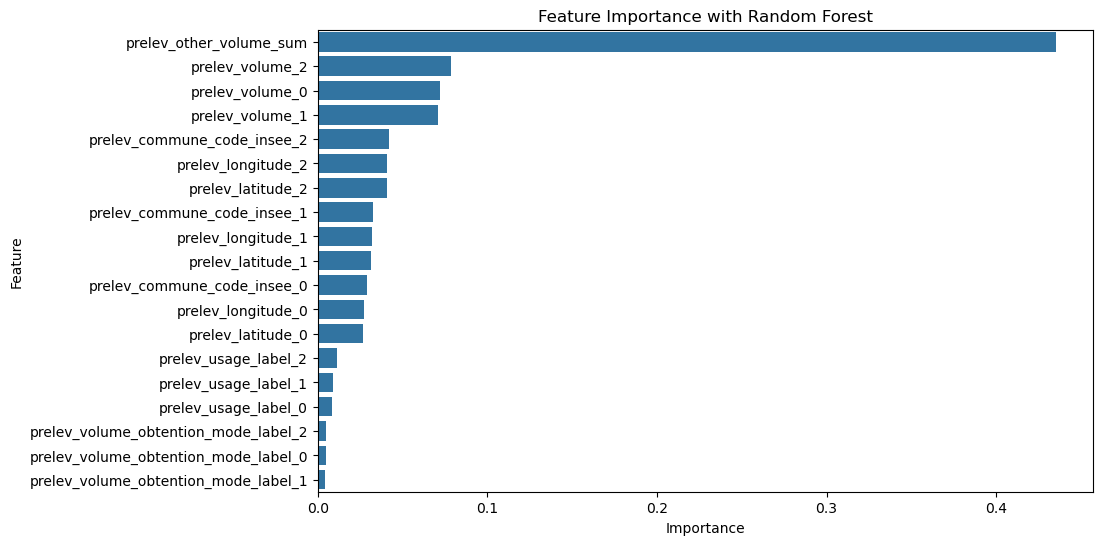

F1 Score: 0.007320109686374618


In [37]:
var = "piezo_groundwater_level_category"

# 1. Separate explanatory variables (X) and the target variable (y)
X = df_clean.drop(columns=[var])
y = df_clean[var]

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Display feature importance
importances = model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by descending importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the results
print(feature_importance)

# 5. Visualize feature importance as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance with Random Forest')
plt.show()

# 6. Predict the target variable on the test set
y_pred = model.predict(X_test)

# 7. Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # For multi-class classification, weighted average
print(f'F1 Score: {f1}')

We select the only relevant feature `prelev_other_volume_sum`. This allows us to focus on the key data while reducing noise and improving the model's performance.

In [40]:
withdrawal_features = ['prelev_other_volume_sum']